In [9]:
import pandas as pd
import os
import warnings
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

In [10]:
warnings.filterwarnings("ignore")

In [11]:
all_dfs_names = [x for x in os.listdir('./Preproject_7_data') if '.csv' in x]

In [12]:
all_dfs =  pd.Series()

for df_name in  all_dfs_names:
    try:
        df = pd.read_csv('./Preproject_7_data/' + df_name,low_memory=False)
    except:
        df = pd.read_csv('./Preproject_7_data/' + df_name,sep='\t',low_memory=False)
        
    all_dfs = all_dfs.append(pd.Series([df],index=[df_name]))

In [13]:
'''    
fig = plt.figure(figsize=(14,2))
    for i,col in enumerate(columns):        
        fig.add_axes([1/cols_num*i, 0, 1/cols_num-indent, 1])
        plt.title(col)
        sns.countplot(df[col])''';

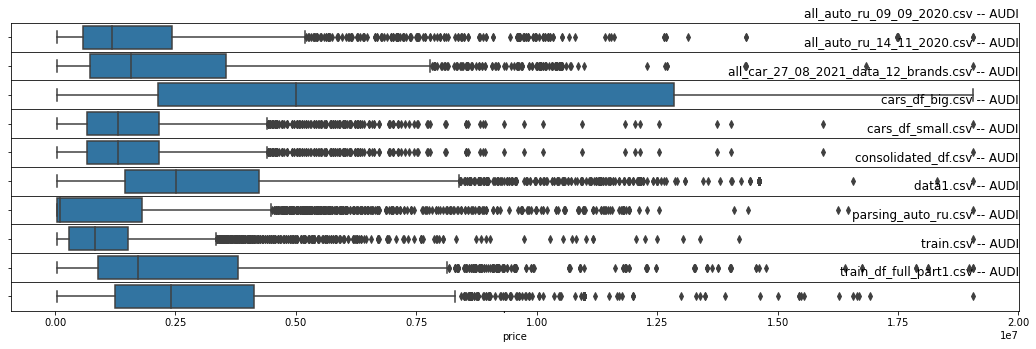

In [14]:
['AUDI', 'BMW', 'CADILLAC']

brend = 'AUDI'

fig = plt.figure(figsize=(14,4))

for i,df_name,df in zip(range(1,len(all_dfs)+1),all_dfs.index,all_dfs):
#     plt.xscale("log")
    try:
        row = df[df.brand.str.upper()==brend].price
        
        fig.add_axes([0, 1-i/len(all_dfs), 1, 1/len(all_dfs)])
        plt.title(df_name+' -- '+brend,loc='right')
        sns.boxplot(x=row)
    except: 
        row = df[df.brand.str.upper()==brend].price.apply(
            lambda x: int(''.join(re.findall("\d+", x))) if type(x)==str else np.NaN)
        fig.add_axes([0, 1-i/len(all_dfs), 1, 1/len(all_dfs)])
        plt.title(df_name+' -- '+brend,loc='right')
        sns.boxplot(x=row)